In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income-classification/income_evaluation.csv


In [2]:
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data  =  pd.read_csv("../input/income-classification/income_evaluation.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(data.shape)
data.info()

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='age'>

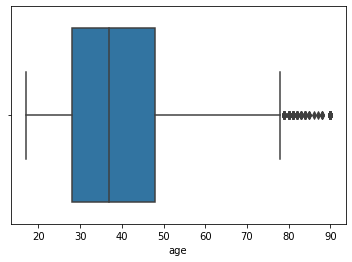

In [7]:
sns.boxplot(data=data, x= "age")


<AxesSubplot:xlabel=' capital-gain'>

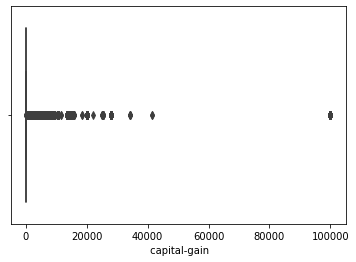

In [8]:
sns.boxplot(data[' capital-gain'])

In [9]:
np.unique(data[' marital-status'])


array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [10]:
np.unique(data[' relationship'])

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [11]:
list = [' relationship',' fnlwgt']
data = data.drop(list,axis=1)

(array([21790.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10771.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

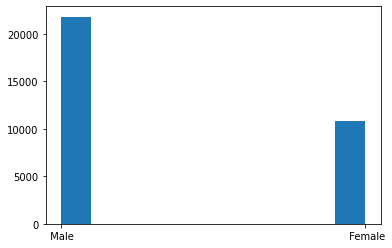

In [12]:
plt.hist(data[' sex'])

In [13]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [14]:
data.isnull().sum()

age                0
 workclass         0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

## Data Preprocessing

In [15]:
data['income_label']= np.where(data[' income']=='<=50K',0,1).astype('int64')

In [16]:
data.drop('income_label',axis=1,inplace =True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    education-num   32561 non-null  int64 
 4    marital-status  32561 non-null  object
 5    occupation      32561 non-null  object
 6    race            32561 non-null  object
 7    sex             32561 non-null  object
 8    capital-gain    32561 non-null  int64 
 9    capital-loss    32561 non-null  int64 
 10   hours-per-week  32561 non-null  int64 
 11   native-country  32561 non-null  object
 12   income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [18]:
data['income_label'] = np.where(data[' income']==' <=50K',0,1).astype('int64')

In [19]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K,0


#### Striping all the spaces of columns using str.strip()

In [20]:
data.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' income', 'income_label'],
      dtype='object')

In [21]:
strip_columns = [' workclass',' education',' marital-status',' occupation',' race',' sex',' native-country',' income' ]

In [22]:
for item in strip_columns:
    data[item] = data[item].str.strip()
    

In [23]:
for item in strip_columns:
    print(item,':',np.unique(data[item]))
    print('\n')

 workclass : ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


 education : ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


 marital-status : ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


 occupation : ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


 race : ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


 sex : ['Female' 'Male']


 native-country : ['?' 'Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-

In [24]:
data.loc[data[' workclass']=='?'].shape

(1836, 14)

In [25]:
data.loc[data[' occupation']=='?'].shape

(1843, 14)

In [26]:
data.loc[data[' native-country']=='?'].shape

(583, 14)

#### *We can either delete these rows or replace them by NaN (Remember these are "categroical" variables) ....Lets replace them*

In [27]:
data[' workclass'].replace('?',np.NaN,inplace=True)

In [28]:
data[' occupation'].replace('?',np.NaN,inplace=True)
data[' native-country'].replace('?',np.NaN,inplace=True)

In [29]:
data.isnull().sum()

age                   0
 workclass         1836
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
income_label          0
dtype: int64

#### Checking whether there is biased or unbiased class label

In [30]:
print(data.loc[data['income_label']==1].shape)
print(data.loc[data['income_label']==0].shape)

(7841, 14)
(24720, 14)


#### THis shows nearly 67% labels are '0' hence data is slightly biased

## Data Visualization

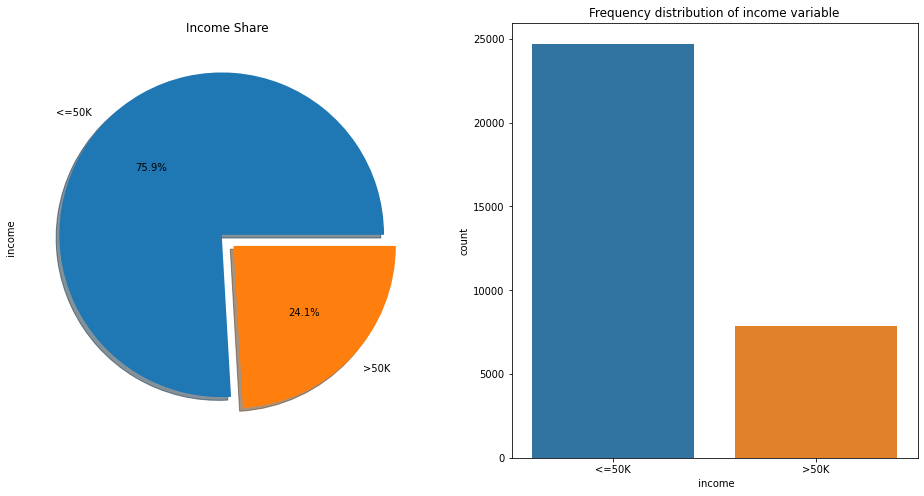

In [31]:
figure,ax=plt.subplots(1,2,figsize=(16,8))

ax[0] = data[' income'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')



ax[1] = sns.countplot(x=' income', data=data)
ax[1].set_title("Frequency distribution of income variable")

plt.show()

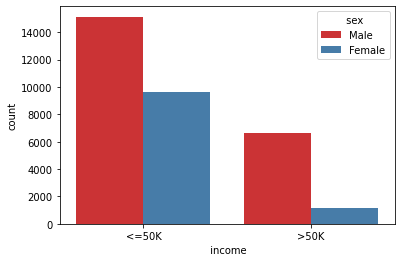

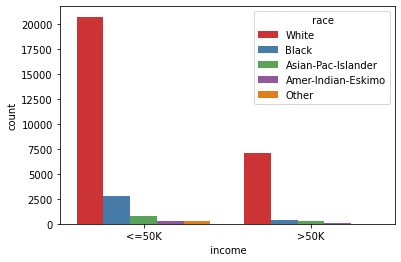

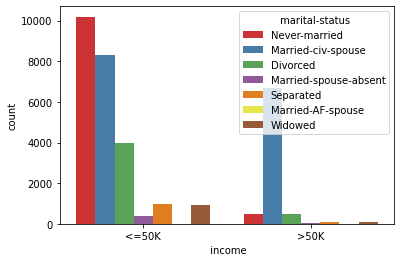

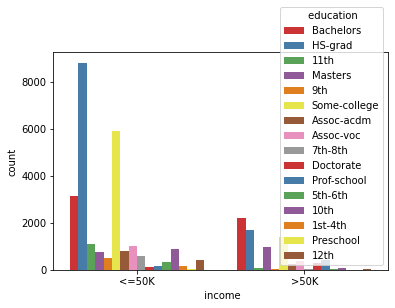

In [32]:
# fig,ax = plt.subplots(2,2,figsize=(10,12))

sns.countplot(x=' income',hue=' sex',data =data, palette='Set1')
# ax[0].set_title("sex vs income")

plt.show()
sns.countplot(x=' income',hue=' race',data =data, palette='Set1')
# ax[1].set_title('race vs income')

plt.show()
sns.countplot(x=' income',hue=' marital-status',data =data, palette='Set1')
# ax[2].set_title('marital-status vs income')

plt.show()
sns.countplot(x=' income',hue=' education',data =data, palette='Set1')
# ax[3].set_title('education vs income')

plt.show()

## Key Points:
#### Males are more in both categories
#### White Race is dominant in both categories 
#### Never - married are higher in <=50K while married-civ-spouse in >50K

#### **Identifying Outliers**

In [33]:
Numerical_col  = ['age',' capital-gain', ' capital-loss',' hours-per-week',' education-num']

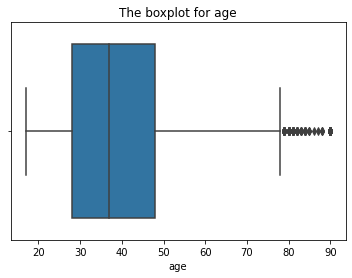

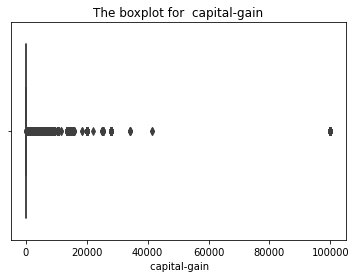

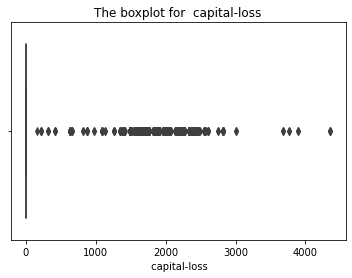

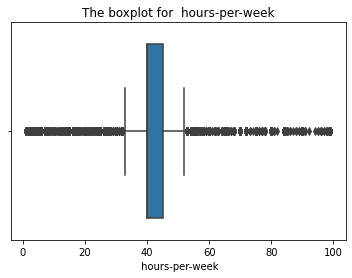

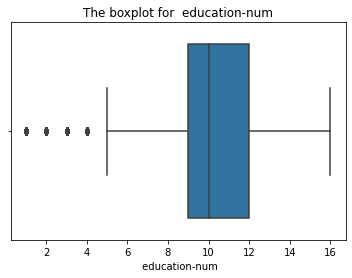

In [34]:
for item in Numerical_col:
    sns.boxplot(x=item,data =data)
    plt.title("The boxplot for {}".format(item))
    plt.show()

we can see outliers in capital gain and capital loss

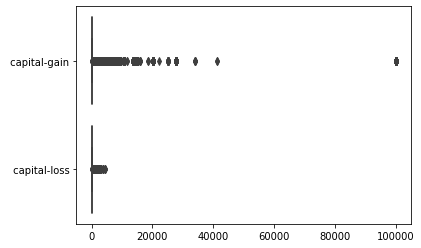

In [35]:
sns.boxplot(data = data[[' capital-gain',' capital-loss']],orient='h')
plt.show()

***Dropping these outliers**

In [36]:
index1 = data.loc[data[' capital-gain']>90000,' capital-gain'].index
data.drop(index=index1,inplace=True)
index2 = data.loc[data[' capital-loss']>4000,' capital-loss'].index
data.drop(index=index2,inplace=True)

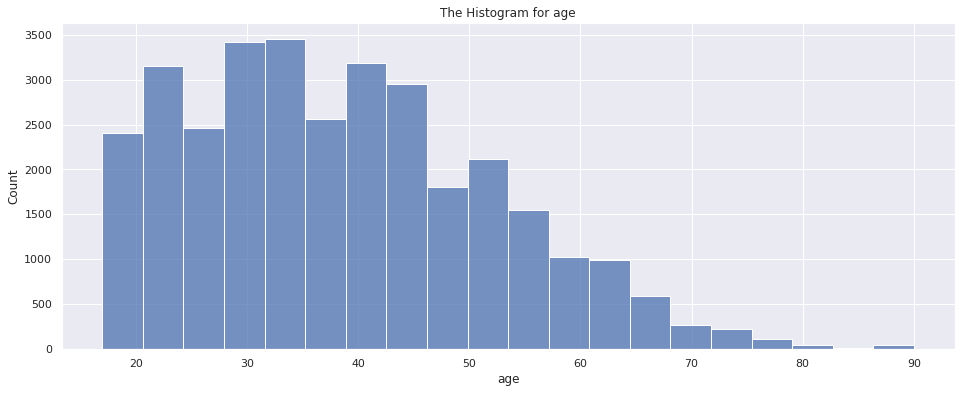

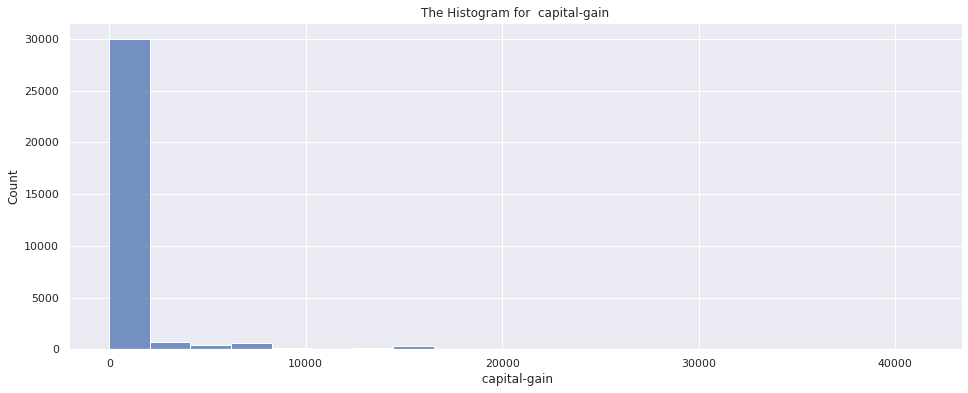

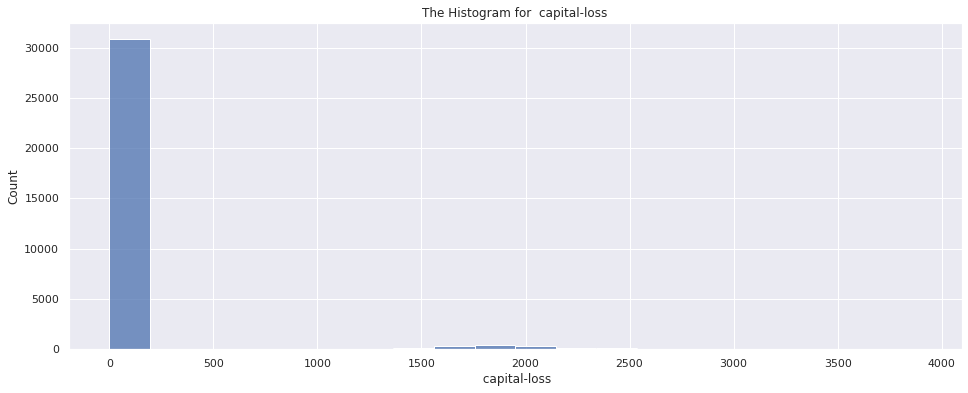

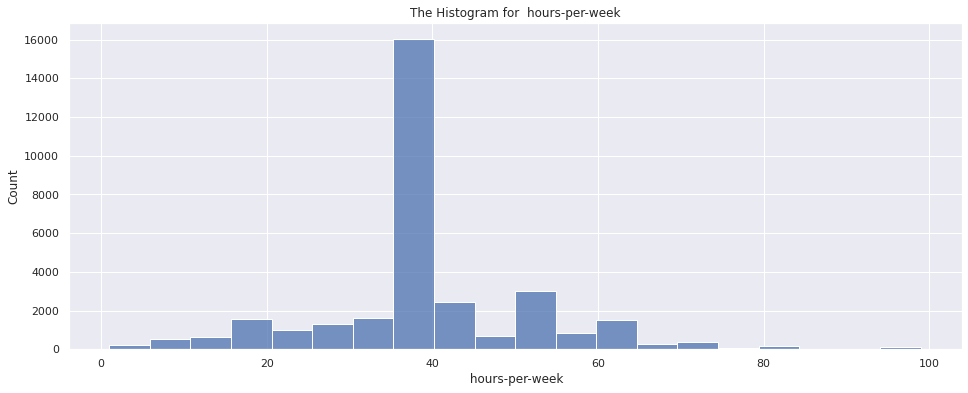

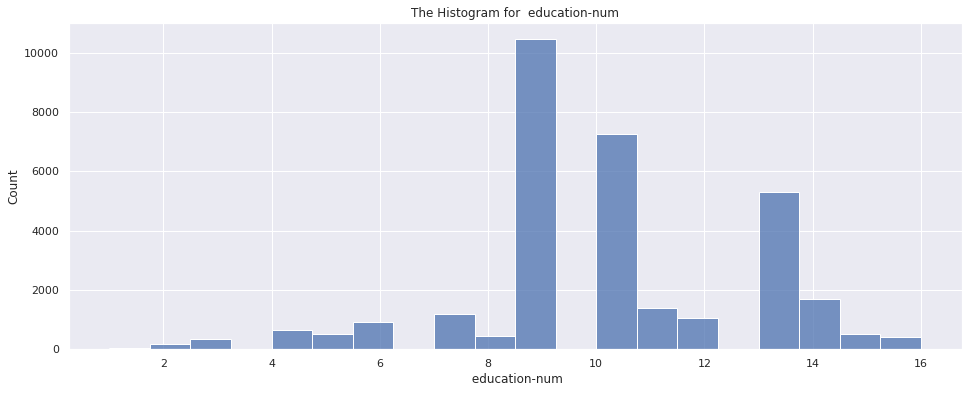

In [37]:
for item in Numerical_col:
    sns.set(rc={"figure.figsize":(16,6)})
    sns.histplot(x=data[item], palette='Set1',bins=20) 
    plt.title("The Histogram for {}".format(item))
    plt.show()

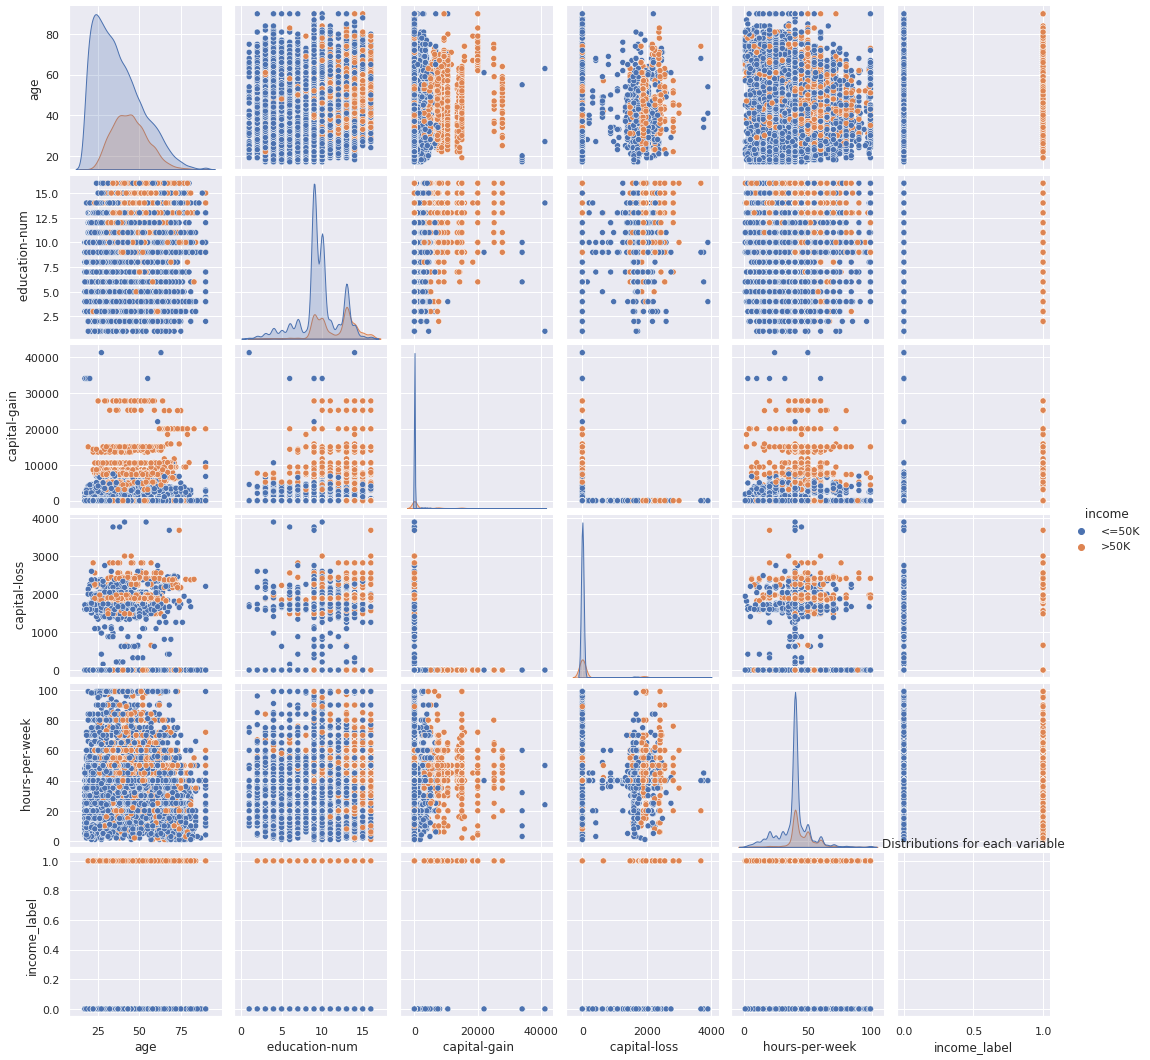

In [38]:
sns.pairplot(data=data, hue=" income")
plt.title('Distributions for each variable')
plt.show()

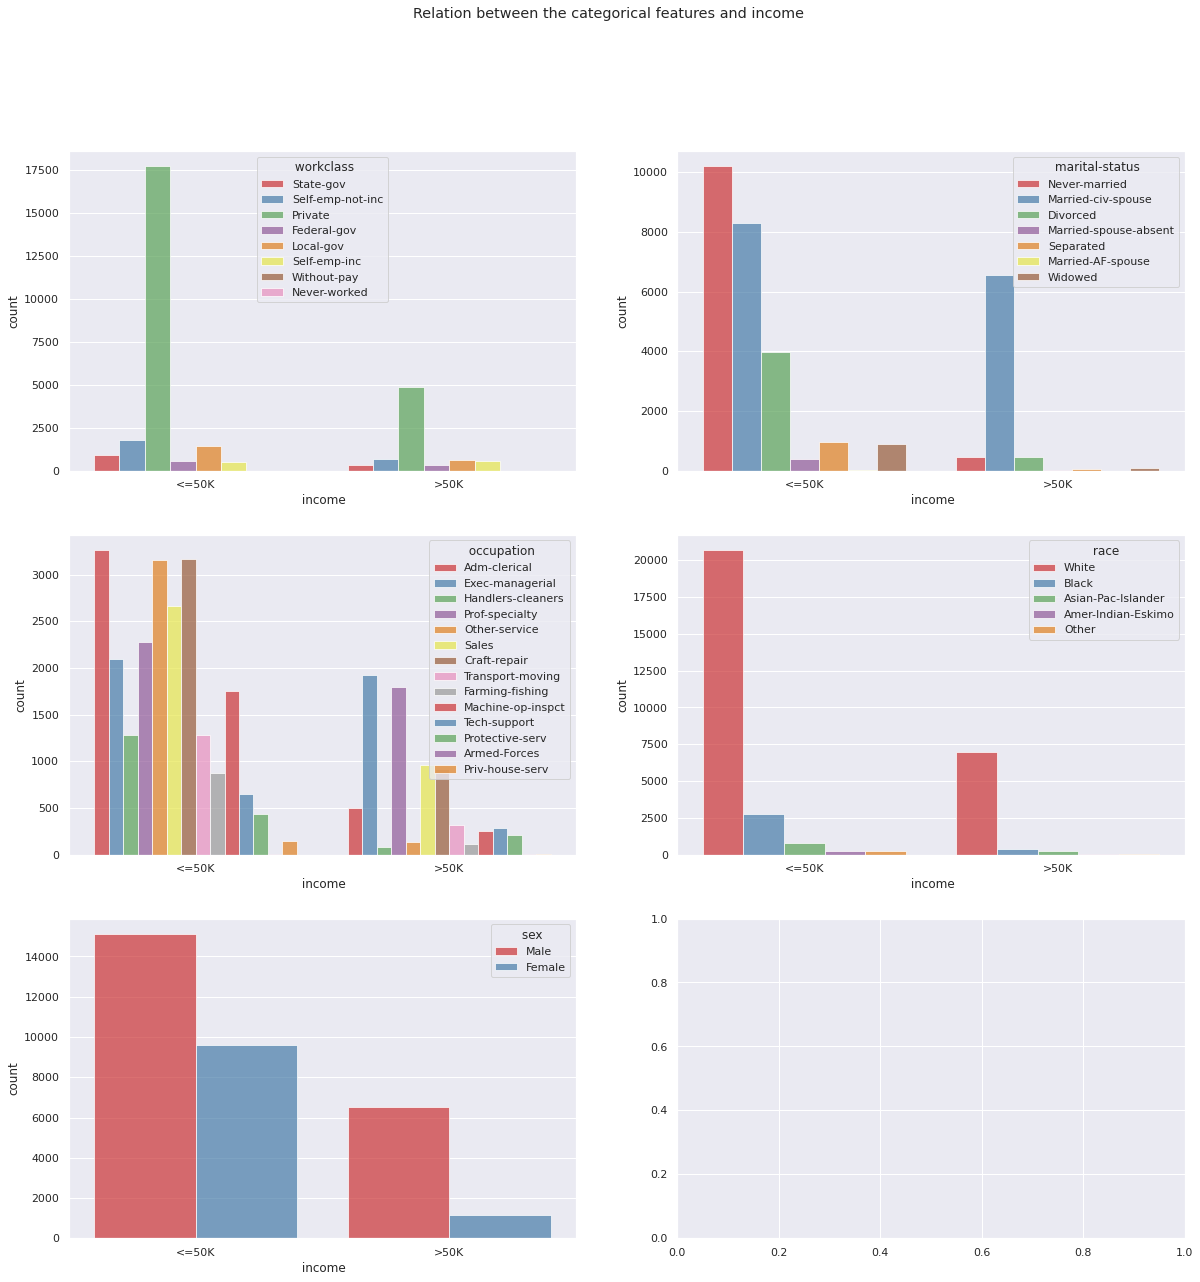

In [39]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = [' workclass', ' marital-status',' occupation',' race',' sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x=' income', alpha=0.7, hue=i, data=data, ax=axs[ax],palette='Set1')

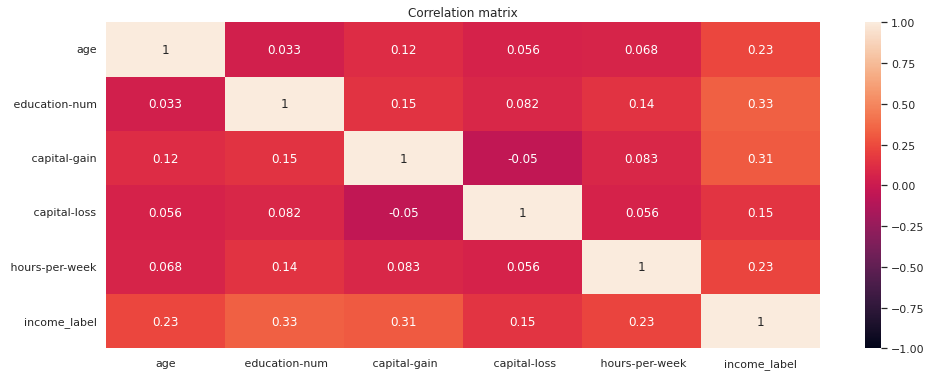

In [40]:
corr = data.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, annot=True)

plt.title('Correlation matrix')
plt.show()

## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
labeler = LabelEncoder()
for item in strip_columns:
    data[item] = labeler.fit_transform(data[item])
    

In [43]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_label
0,39,6,9,13,4,0,4,1,2174,0,40,38,0,0
1,50,5,9,13,2,3,4,1,0,0,13,38,0,0
2,38,3,11,9,0,5,4,1,0,0,40,38,0,0
3,53,3,1,7,2,5,2,1,0,0,40,38,0,0
4,28,3,9,13,2,9,2,0,0,0,40,4,0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32399 non-null  int64
 1    workclass       32399 non-null  int64
 2    education       32399 non-null  int64
 3    education-num   32399 non-null  int64
 4    marital-status  32399 non-null  int64
 5    occupation      32399 non-null  int64
 6    race            32399 non-null  int64
 7    sex             32399 non-null  int64
 8    capital-gain    32399 non-null  int64
 9    capital-loss    32399 non-null  int64
 10   hours-per-week  32399 non-null  int64
 11   native-country  32399 non-null  int64
 12   income          32399 non-null  int64
 13  income_label     32399 non-null  int64
dtypes: int64(14)
memory usage: 4.7 MB


## Normalizing the variables

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
model = scaler.fit(data.drop(['income_label'],axis=1))
scaled_data = scaler.transform(data.drop(['income_label'],axis=1))
type(scaled_data)


numpy.ndarray

In [47]:
data.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' income', 'income_label'],
      dtype='object')

In [48]:
new_column = ['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' income']

In [49]:
data_scaled = pd.DataFrame(scaled_data,columns=new_column)

In [50]:
data_scaled.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,1.0,1.0,0.052626,0.0,0.397959,0.926829,0.0
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,1.0,1.0,0.000000,0.0,0.122449,0.926829,0.0
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,1.0,1.0,0.000000,0.0,0.397959,0.926829,0.0
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.5,1.0,0.000000,0.0,0.397959,0.926829,0.0
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,0.5,0.0,0.000000,0.0,0.397959,0.097561,0.0


### Using *SMOTETomek* to handle imbalanced dataset

In [51]:
from imblearn.combine import SMOTETomek

In [52]:
X = data_scaled
Y= data.income_label

In [53]:
Y.value_counts()

0    24717
1     7682
Name: income_label, dtype: int64

In [54]:
smk  = SMOTETomek(random_state=42)
X_res,Y_res = smk.fit_resample(X,Y)

In [55]:
from collections import Counter
print("Original dataset shape {}".format(Counter(Y)))
print("Resampled dataset shape {}".format(Counter(Y_res)))


Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24717, 1: 24717})


In [56]:
X_res.shape,Y_res.shape

((49434, 13), (49434,))

### TRAIN_TEST_SPLIT

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train ,X_test ,Y_train, Y_test =  train_test_split(X_res,Y_res,test_size=0.30,random_state=101,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(34603, 13) (14831, 13) (34603,) (14831,)


# Building Models 

### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [60]:
X_train.drop(' income',axis=1,inplace=True)


In [61]:
X_test.drop(' income',axis=1,inplace =True)

In [62]:
gradient_booster  = GradientBoostingClassifier(learning_rate=0.05)
accuracy = cross_val_score(gradient_booster,X_train,Y_train,cv=5)
gradient_booster.fit(X_train,Y_train)

print("Score after training:",np.mean(accuracy))
print("Score after testing:", gradient_booster.score(X_test,Y_test))
print(accuracy)

Score after training: 0.8411699376865084
Score after testing: 0.8451891308745196
[0.84034099 0.84062997 0.83918509 0.83684971 0.84884393]


In [63]:
parameters = { 'learning_rate':[0.01,0.1,0.05],
              'n_estimators': np.arange(100,500,100)}


In [64]:
gb_object  = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb_object,parameters,cv=4)
gb_cv.fit(X_train,Y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,Y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8890270896545088
Test Score: 0.8915110242060549


### SVC

In [65]:
from sklearn.svm import SVC

In [66]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}



In [67]:
# svm  = SVC ()
# svm_cv = GridSearchCV(svm, grid, cv = 5)
# svm_cv.fit(X_train,Y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)
# print("Test Score:",svm_cv.score(X_test,Y_test))

### LOGISTIC REGRESSION